# Sometimes the columns in your pandas dataframe might be on<br>
two drastically different scales, depicting the data is problematic as the column of the smaller scale appears to be a straight flat line towards the bottom of the plot.  This notebook aims to offer some solutions that might help for such a situation.
<br>
<br>
The data is the adjusted closing price for Apple stock (AAPL), ranging from 1/29/2018 until 1/27/2023.  For the purposes of this notebook, we only care about the date, price and volume columns.
<br>
<br>
The source is  https://finance.yahoo.com/
<br>
<br>
Inspired by DataCamp's: Manipulating Time Seriesdata in Python, Chapter 2 p48

Start by importing libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Below - how to import the csv as a datetime with only the relevant columns, and setting the date column as a datetime:

In [2]:
pd.set_option('display.float_format', '{:.2f}'.format) #Prevents pandas from converting large numbers in csv to exponential
df_apple = pd.read_csv('AAPL.csv',
                       usecols = ['Date', 'Adj Close', 'Volume'],
                       parse_dates=['Date'], 
                       index_col='Date')

Below - how to resample the pandas datetime, by month by mean. Then change the column names accordingly and round.  This is not entirely necessary but will make the charts look better as it will make the dataframe smaller and reduce the "clutter" on the charts

In [3]:
df_apple = df_apple.resample('M').mean()
df_apple.columns = ['Monthly_Avg_Adj_Close', 'Monthly_Avg_Volume']
df_apple['Monthly_Avg_Adj_Close'] = df_apple['Monthly_Avg_Adj_Close'].round(2)
df_apple['Monthly_Avg_Volume'] = df_apple['Monthly_Avg_Volume'].round().astype(int)
df_apple.head()

,Monthly_Avg_Adj_Close,Monthly_Avg_Volume
Date,,
2018-01-31,39.81,172223333
2018-02-28,39.97,195346168
2018-03-31,41.65,135948133
2018-04-30,40.54,126886533
2018-05-31,44.40,112904782


# Problem - the price and volume of Apple stock are on such different scales, it does not work well to plot the price column with the volume column.

In [4]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(15.7,7.27)})

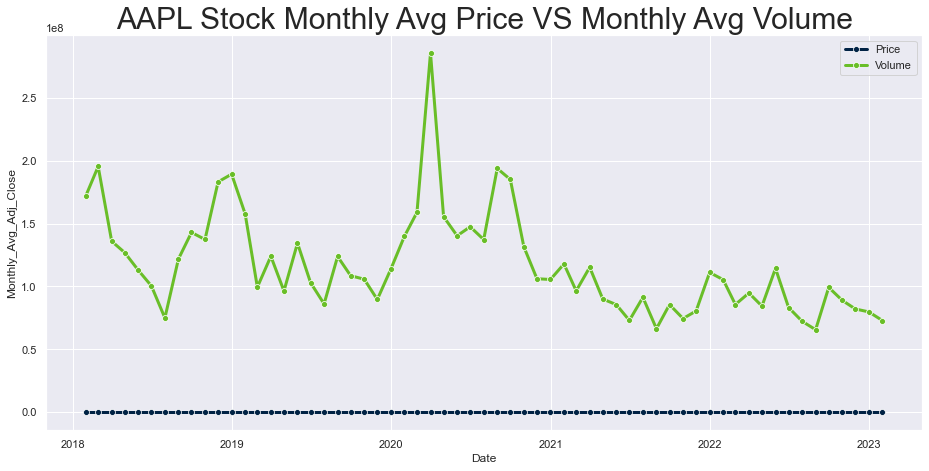

In [5]:
sns.lineplot(data=df_apple, x=df_apple.index, y='Monthly_Avg_Adj_Close',
             label = 'Price', color = '#002244',
             linewidth = 3, marker = 'o', ms=6)
sns.lineplot(data=df_apple, x=df_apple.index, y='Monthly_Avg_Volume',
             label = 'Volume', color = '#69BE28',
             linewidth = 3, marker = 'o', ms=6)
plt.title('AAPL Stock Monthly Avg Price VS Monthly Avg Volume', fontsize=30)
plt.show()

# Solution 1: use subplots

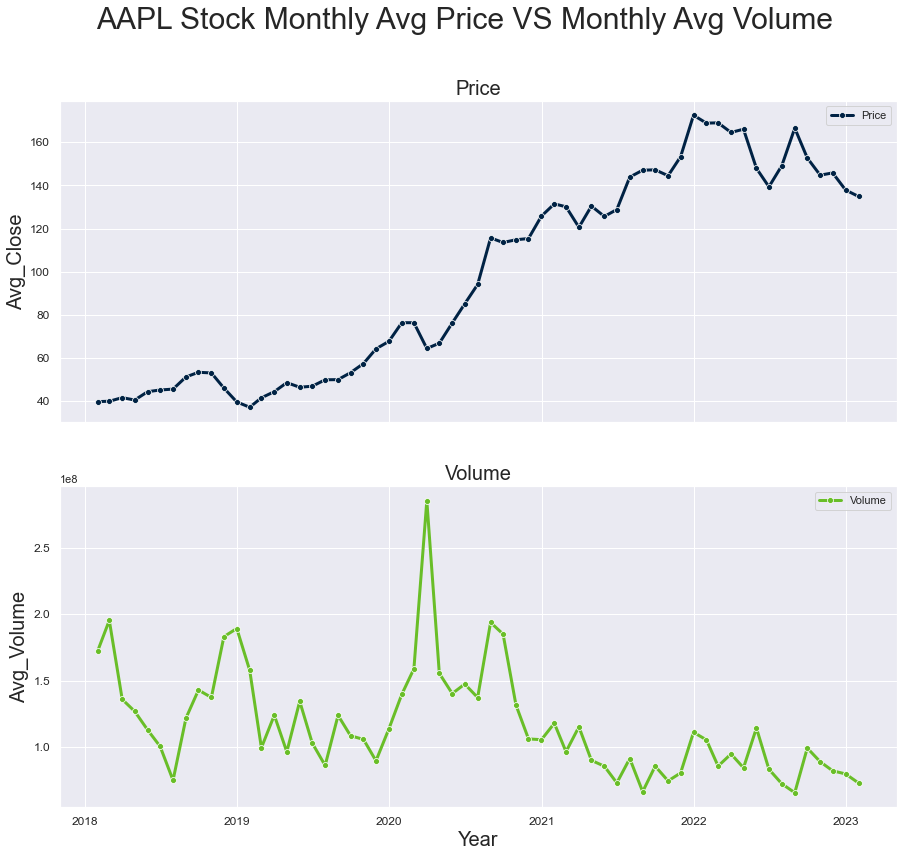

In [6]:
fig, axes = plt.subplots(2, 1, figsize=(15, 13), sharex=True)
fig.suptitle('AAPL Stock Monthly Avg Price VS Monthly Avg Volume', fontsize=30)

# Top
sns.lineplot(ax=axes[0], data=df_apple, x=df_apple.index, y='Monthly_Avg_Adj_Close',
             label = 'Price', color = '#002244',
             linewidth = 3, marker = 'o', ms=6)
axes[0].set_title('Price', fontsize=20)
axes[0].set_ylabel('Avg_Close', fontsize=20)
axes[0].tick_params(axis='y', labelsize=12)


#Bottom
sns.lineplot(ax=axes[1], data=df_apple, x=df_apple.index, y='Monthly_Avg_Volume',
             label = 'Volume', color = '#69BE28',
             linewidth = 3, marker = 'o', ms=6)
axes[1].set_title('Volume', fontsize=20)
axes[1].set_ylabel('Avg_Volume', fontsize=20)
axes[1].tick_params(axis='y', labelsize=12)    

axes[1].set_xlabel('Year', fontsize=20)
axes[1].tick_params(axis='x', labelsize=12) 

plt.show()

# Solution 2: use two y axes

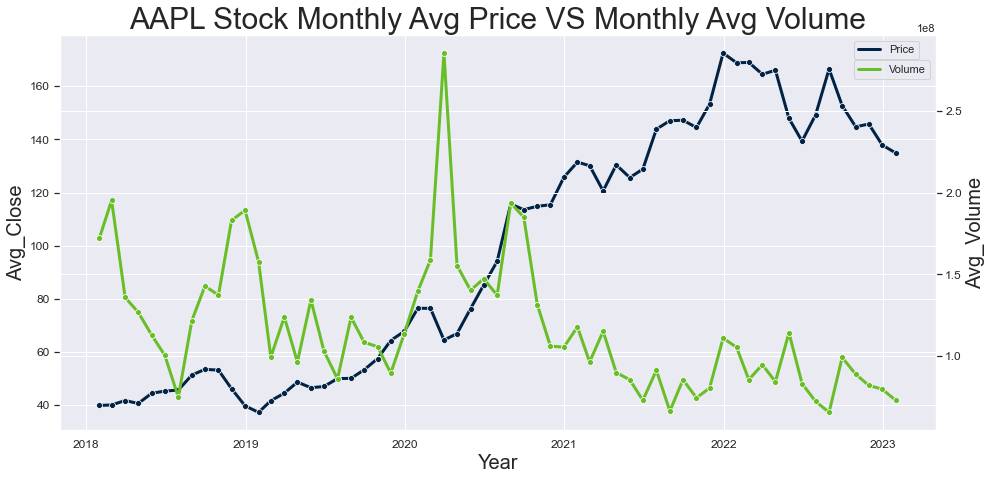

In [7]:
price_chart =sns.lineplot(data=df_apple, x=df_apple.index, y='Monthly_Avg_Adj_Close',
                          label = 'Price', color = '#002244',
                          linewidth = 3, marker = 'o', ms=6)
sns.move_legend(price_chart, loc = 'upper right', bbox_to_anchor=(.987, 1))
price_chart.set_ylabel('Avg_Close', fontsize=20)
price_chart.tick_params(axis='y', labelsize=12,)
price_chart.set_xlabel('Year', fontsize=20)
price_chart.tick_params(axis='x', labelsize=12)


volume_chart = price_chart.twinx()
volume_chart = sns.lineplot(data=df_apple, x=df_apple.index, y='Monthly_Avg_Volume',
                            label = 'Volume', color = '#69BE28',
                            linewidth = 3, marker = 'o', ms=6)
sns.move_legend(volume_chart, loc = 'upper right', bbox_to_anchor=(1, .95))
volume_chart.set_ylabel('Avg_Volume', fontsize=20)
volume_chart.tick_params(axis='y', labelsize=12)

#just for fun here is how to change the color of the two y axes(lable and tick marks)
#price_chart.set_ylabel('Avg_Close', color = '#002244')
#price_chart.tick_params(axis = 'y', labelcolor = '#002244')
#volume_chart.set_ylabel('Avg_Volume', color = '#69BE28')
#volume_chart.tick_params(axis = 'y', labelcolor = '#69BE28')

plt.title('AAPL Stock Monthly Avg Price VS Monthly Avg Volume', fontsize=30)
plt.show()

# Solution 3: rescale to percentage change

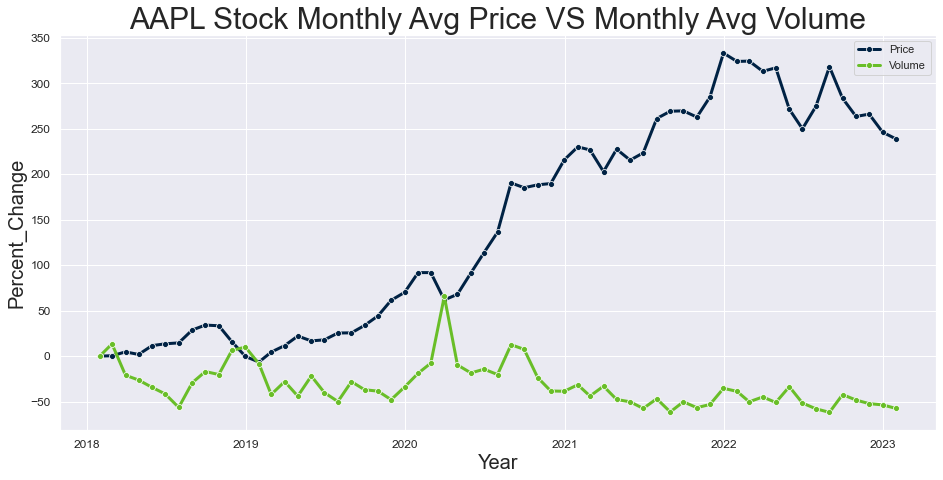

In [8]:
df_apple = df_apple.div(df_apple.iloc[0]).mul(100).sub(100)
#or Alternatively the code below does the exact samething:
#df_apple = df_apple.sub(df_apple.iloc[0]).div(df_apple.iloc[0]).mul(100)

price = sns.lineplot(data=df_apple, x=df_apple.index, y='Monthly_Avg_Adj_Close',
                     label = 'Price', color = '#002244',
                     linewidth = 3, marker = 'o', ms=6)
volume = sns.lineplot(data=df_apple, x=df_apple.index, y='Monthly_Avg_Volume',
                     label = 'Volume', color = '#69BE28',
                     linewidth = 3, marker = 'o', ms=6)
plt.title('AAPL Stock Monthly Avg Price VS Monthly Avg Volume', fontsize=30)
price.set_ylabel('Percent_Change', fontsize=20)
price.set_xlabel('Year', fontsize=20)
plt.tick_params(axis='both', labelsize=12)
plt.show()